In [1]:
type Not[P] = P => Nothing
type <=>[P, Q] = (P => Q, Q => P)
//Double negation theorem --> DNx : Not(Not[X]) => X
//Law of the third middle --> TMx : Either[X,Not[X]] 

defined type Not
defined type <=>

In [2]:
def resolution[A, B, C](p1: Either[A, C], p2: Either[B, Not[C]]): Either[A, B] = 
    (p1, p2) match
        case (Left(a), _) => Left(a)
        case (_, Left(b)) => Right(b)
        case (Right(c), Right(nc)) => nc(c): Nothing

defined function resolution

## 1. Refutation:
$$
\begin{array}{c}
& \neg (p \wedge q) \vee \neg r & \\
& r \vee \neg q & \\
\hline
& \neg p \vee \neg q & \\
\end{array}
$$

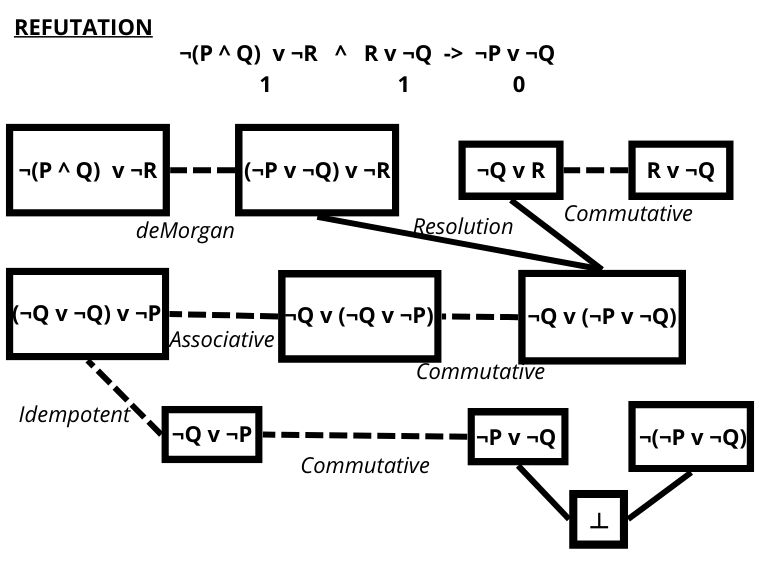

In [3]:
def commutativeEither[A,B] : Either[A, B] => Either[B, A] =
    case Left(a) => Right(a)
    case Right(b) => Left(b)

def deMorganAND2EITHER[A,B](thirdMiddleA: Either[A, Not[A]]): Not[(A, B)] => Either[Not[A], Not[B]] = 
    notAB => 
        thirdMiddleA.fold(
            a => Right((b) => notAB((a, b)))
            ,
            na => Left((a) => na(a))
        )

def idempotent[A] : Either[A, A] => A =
    _.fold(identity, identity)

def associative[P,Q,R] : Either[P,Either[Q,R]] => Either[Either[P,Q],R] =
    case Left(p) => Left(Left(p))
    case Right(qORr) => qORr match
        case Left(q) => Left(Right(q))
        case Right(r) => Right(r)

defined function commutativeEither
defined function deMorganAND2EITHER
defined function idempotent
defined function associative

In [4]:
def refutacion1[P,Q,R](p1: Either[Not[(P, Q)], Not[R]])(p2: Either[R, Not[Q]])(tmp : Either[P, Not[P]]) : Not[Either[Not[P], Not[Q]]] => Nothing =
    (negated : Not[Either[Not[P], Not[Q]]]) =>
        val NPorNQ_orNR : Either[Either[Not[P], Not[Q]], Not[R]] = p1.fold(npq => Left(deMorganAND2EITHER(tmp)(npq)), nr => Right(nr))
        val p2commutative : Either[Not[Q], R] = commutativeEither(p2)
        val NQor_NPorNQ : Either[Not[Q], Either[Not[P], Not[Q]]] = resolution(p2commutative, NPorNQ_orNR)
        val NQor_NQorNP : Either[Not[Q], Either[Not[Q], Not[P]]] = NQor_NPorNQ.fold(nq => Left(nq), npnq => Right(commutativeEither(npnq)))
        val NQorNQ_orNP : Either[Either[Not[Q], Not[Q]], Not[P]] = associative(NQor_NQorNP)
        val NQorNP : Either[Not[Q], Not[P]] = NQorNQ_orNP.fold(nqnq => Left(idempotent(nqnq)), np => Right(np))
        val NPorNQ : Either[Not[P], Not[Q]] = commutativeEither(NQorNP)
        negated(NPorNQ) : Nothing

defined function refutacion1

## 2. Resolution:
$$
\begin{array}{c} 
& T [ \neg s \wedge (r \rightarrow t), \neg r \rightarrow (p \rightarrow q), t \rightarrow \neg r]\vdash \neg s \wedge \neg (\neg q \wedge p) & 
\end{array}
$$


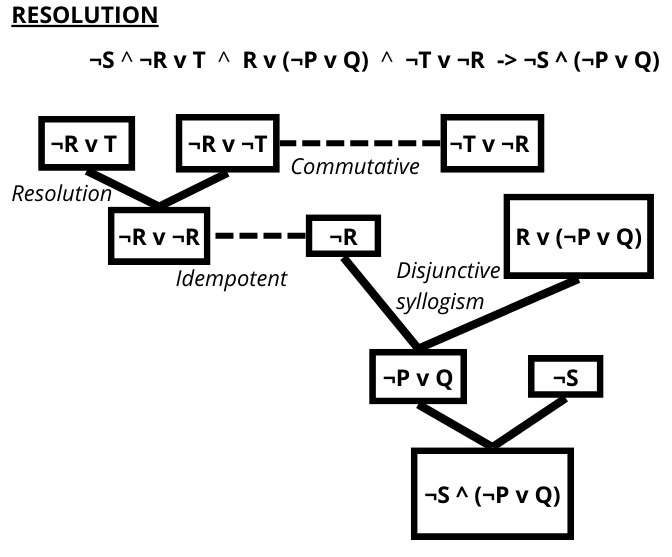

In [5]:
def disjunctiveSyllogism[A,B] : ((Either[A, B], Not[A])) => B =
    and =>
        and._1.fold(
            a => and._2(a)
            ,
            b => b
        )

defined function disjunctiveSyllogism

In [6]:
def resolucion2[P,Q,R,S,T](p1: (Not[S], Either[Not[R], T]))(p2: Either[R, Either[Not[P], Q]])(p3: Either[Not[T], Not[R]]) : (Not[S], Either[Not[P], Q]) =
    val p3commutative : Either[Not[R], Not[T]] = commutativeEither(p3)
    val eitherNRs : Either[Not[R], Not[R]] = resolution(p1._2, p3commutative)
    val NR : Not[R] = idempotent(eitherNRs)
    val NPorQ : Either[Not[P], Q] = disjunctiveSyllogism(p2, NR)
    (p1._1, NPorQ) : (Not[S], Either[Not[P], Q])

defined function resolucion2